In [1]:
import sys
from pathlib import Path
from torchvision import datasets

In [2]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

data_root = project_root / "data"
data_root.mkdir(parents=True, exist_ok=True)

In [4]:
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

from utils.utils import set_seed

set_seed()

from methods.naive.naive_utils import init_dataloaders
from utils.train_test_metrics import train_model
from utils.train_test_metrics import plot_training_history
from utils.train_test_metrics import test_model
from utils.train_test_metrics import show_metrics
from models.resnet50 import init_model_resnet50
from methods.naive.naive_utils import update_splits_after_unlearning
from methods.naive.naive_utils import recreate_dataloaders

Device used: cuda


In [5]:
BATCH_SIZE = 256
LEARNING_RATE = 5e-5
EPOCHS = 5

In [6]:
model, model_name, criterion, optimizer, transform = init_model_resnet50(
    learning_rate=LEARNING_RATE, fc_output=10
)

Init model...
Done initializing model.
Model ID: 1849631600896, Optimizer ID: 1851092467424, Criterion ID: 1851092467568


In [7]:
results_path = project_root / "results" / "cifar10" / "naive"

In [8]:
train_dataset = datasets.CIFAR10(
    root=data_root, train=True, transform=transform, download=True
)
test_dataset = datasets.CIFAR10(
    root=data_root, train=False, transform=transform, download=True
)
data_split_path = results_path / "cifar10_data_splits.json"

train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=data_split_path,
    datasets=(train_dataset, test_dataset),
    batch_size=BATCH_SIZE,
)

Recreating DataLoaders...
Done recreating DataLoaders.


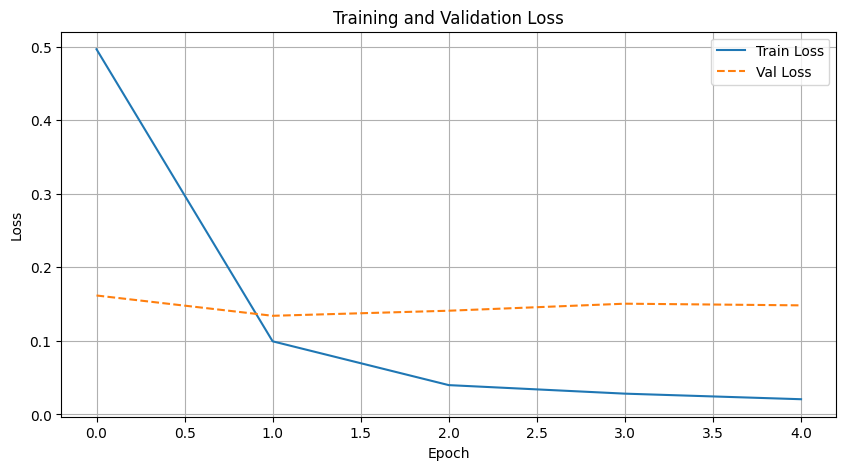

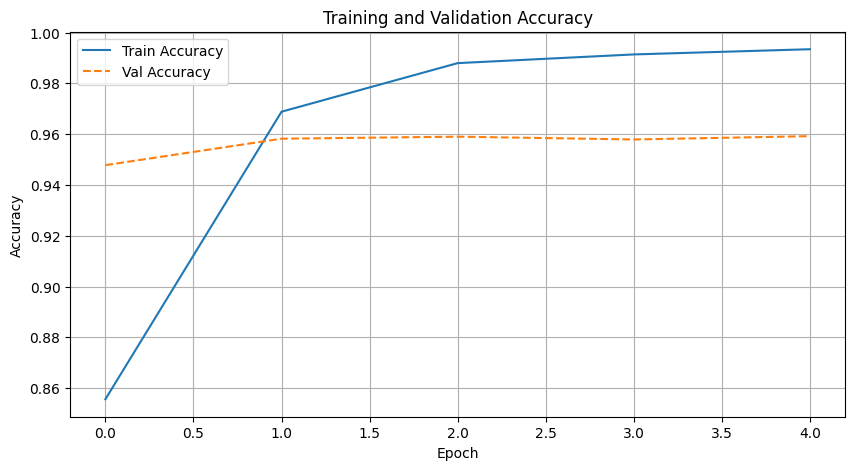

In [9]:
history_path = results_path / f"{model_name}_history.json"
plot_training_history(history_path)

In [11]:
model_path = results_path / f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader, results_path=results_path)

Loading and testing model: ResNet50_CIFAR10


Evaluating model: D:\Unlearning\results\cifar10\naive\ResNet50_CIFAR10_model.pth: 100%|██████████| 40/40 [01:14<00:00,  1.86s/it]

Predictions and labels saved to ResNet50_CIFAR10_predictions.json


Metrics for ResNet50_CIFAR10:
  - Test Accuracy: 0.9561
  - Precision: 0.9564
  - Recall: 0.9561
  - F1 Score: 0.9561


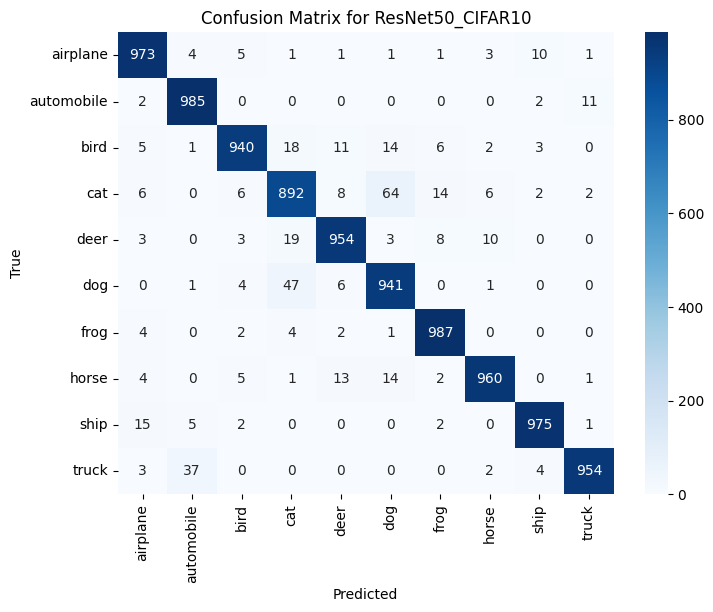

In [12]:
predictions_path = results_path / f"{model_name}_predictions.json"
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

# Naive unlearning results


In [13]:
data_splits_file = results_path / "cifar10_data_splits.json"
unlearn_samples_file = results_path / "cifar10_samples_to_unlearn_30per.json"
updated_data_splits_path = results_path / "updated_cifar10_data_splits.json"

In [14]:
model, model_name, criterion, optimizer, transform = init_model_resnet50(
    learning_rate=LEARNING_RATE, fc_output=10
)
model_name = "naive_unlearning_" + model_name

Init model...
Done initializing model.
Model ID: 1849290094672, Optimizer ID: 1849313205008, Criterion ID: 1849313204960


In [15]:
train_dataset = datasets.CIFAR10(
    root=data_root, train=True, transform=transform, download=True
)
test_dataset = datasets.CIFAR10(
    root=data_root, train=False, transform=transform, download=True
)

In [16]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    datasets=(train_dataset, test_dataset),
    batch_size=BATCH_SIZE,
)

Recreating DataLoaders...
Done recreating DataLoaders.


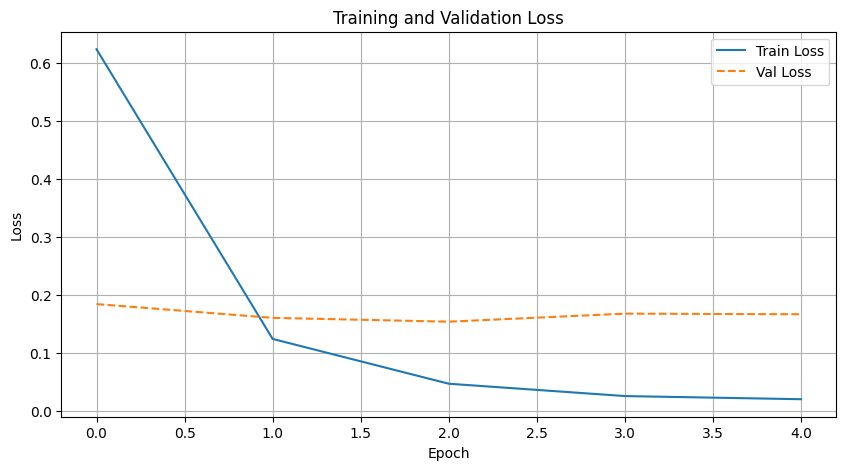

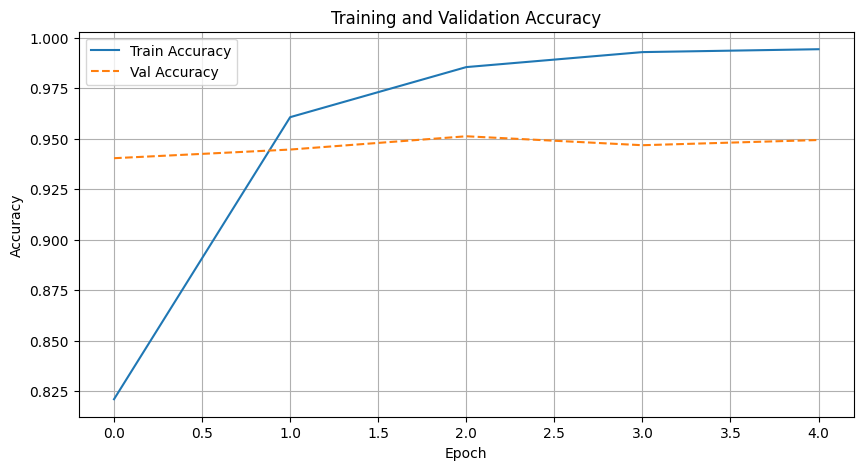

In [17]:
history_path = results_path / f"{model_name}_history.json"
plot_training_history(history_path)

In [18]:
model_path = results_path / f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader, results_path=results_path)

Loading and testing model: naive_unlearning_ResNet50_CIFAR10


Evaluating model: D:\Unlearning\results\cifar10\naive\naive_unlearning_ResNet50_CIFAR10_model.pth: 100%|██████████| 40/40 [01:12<00:00,  1.81s/it]

Predictions and labels saved to naive_unlearning_ResNet50_CIFAR10_predictions.json


Metrics for naive_unlearning_ResNet50_CIFAR10:
  - Test Accuracy: 0.9497
  - Precision: 0.9499
  - Recall: 0.9497
  - F1 Score: 0.9497


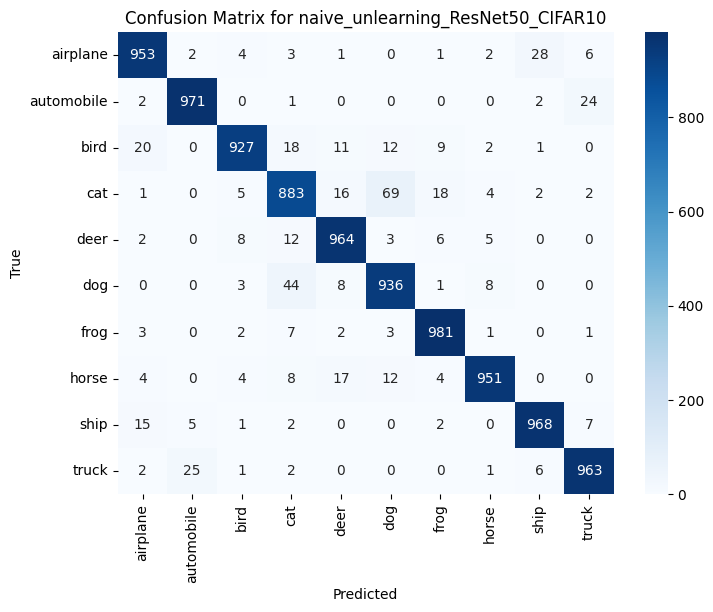

In [19]:
predictions_path = results_path / f"{model_name}_predictions.json"
show_metrics(predictions_path, classes, model_name)